In [1]:
# Run this cell if you are using Google Colab or any other notebook cloud service
# If you are using a local notebook server, you can skip this cell
!git clone https://github.com/isa-group/saas-pricing

Cloning into 'saas-pricing'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 213 (delta 98), reused 171 (delta 60), pack-reused 0
Receiving objects: 100% (213/213), 4.23 MiB | 18.19 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [11]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [3]:
YEARS_STUDIED = ["2019", "2020", "2021", "2022", "2023"]
COLORS = ["red", "orange", "yellow", "green", "blue"]

In [4]:
PRICING_DATA = pd.read_excel("saas-pricing/datasets/pricingData.xlsx")

print(PRICING_DATA.head())

   saasName  year  informationFeatures  integrationFeatures  toolFeatures  \
0     Canva  2023                    3                    1            44   
1  Clockify  2023                   10                    4            23   
2    Github  2023                    3                    5            19   
3      Jira  2023                   11                    6            43   
4    Monday  2023                    9                    6            18   

   automationFeatures  managementFeatures  numberOfFeatures  numberOfAddOns  \
0                   1                   7                56               0   
1                   4                  26                67               0   
2                   8                  10                45               5   
3                   8                   6                74               2   
4                   2                  16                51               0   

   numberOfCommonFeatures  numberOfPlans  
0                  

In [47]:
# DEFINITION OF USEFUL FUNCTIONS

def get_saas_names():
  return tuple(set(PRICING_DATA['saasName'].to_list()))

def create_chart_data(objective_attribute):
  """
  Builds the data needed to create a dumbell chart to see the evolution of a field between 2019 and 2023
  """
  chart_data = {"line_x": [], "line_y": [], "2019": [], "2020": [], "2021": [], "2022": [], "2023": []}

  saasNames = get_saas_names()

  for saas in saasNames:

      max_value_of_saas = float("-inf")
      min_value_of_saas = float("+inf")

      for year in YEARS_STUDIED:

          try:
              saas_year_data = PRICING_DATA.loc[(PRICING_DATA.year == int(year)) & (PRICING_DATA.saasName == saas)][objective_attribute].values[0]
              if saas_year_data > max_value_of_saas:
                  max_value_of_saas = saas_year_data

              if saas_year_data < min_value_of_saas:
                  min_value_of_saas = saas_year_data

          except IndexError:
              saas_year_data = None

          chart_data[year].extend([saas_year_data])

      chart_data["line_x"].extend([
          max_value_of_saas,
          min_value_of_saas,
          None
      ])
      chart_data["line_y"].extend([saas, saas, None])

  return chart_data

def plot_dumbell_chart(chart_data, title, x_axis_name, include_title):
  """
  Plots a dumbell chart to see the evolution of a field between 2019 and 2023
  """

  data = data=[
          go.Scatter(
              x=chart_data["line_x"],
              y=chart_data["line_y"],
              mode="lines",
              showlegend=False,
              marker=dict(
                  color="grey"
              )
            )
          ]

  for i in range(len(YEARS_STUDIED)):

    year = YEARS_STUDIED[i]
    color = COLORS[i]

    data.append(
        go.Scatter(
              x=chart_data[year],
              y=get_saas_names(),
              mode="markers",
              name=year,
              marker=dict(
                  color=color,
                  size=10
              )

          )
    )

  fig = go.Figure(
      data=data
  )

  fig.update_layout(
      title=title if include_title else "",
      height=1000,
      legend_itemclick=False,
      xaxis_title=x_axis_name,
      font=dict(
        size=20
        ),
  )

  fig.show()

def plot_evolution_graph(attribute):
  fig, ax = plt.subplots(figsize=(12, 6))

  saas_names = get_saas_names()

  colors = plt.cm.viridis_r(
      [i / float(len(saas_names) - 1) for i in range(len(saas_names))]
  )

  for i, saas_name in enumerate(saas_names):
      saas_data = PRICING_DATA[PRICING_DATA['saasName'] == saas_name].sort_values(by='year')
      ax.plot(saas_data['year'], saas_data[attribute], label=saas_name, color=colors[i], marker='o')

  ax.set_xlabel('Year')
  ax.set_ylabel(attribute)
  ax.set_title(f'Evolution of {attribute} in Web SaaS Platforms')
  ax.legend(
      bbox_to_anchor=(1.05, 1),
      loc='upper left'
  )
  plt.xticks([2019, 2020, 2021, 2022, 2023])
  plt.grid(True)
  plt.show()

def build_ascii_table (table, **k):
    "Creates an ascii table by defining its content and headers"

    header = k.get('header', [])
    align = k.get('align', 'left')
    border = k.get('border', False)

    widths = []
    for i in range(max(map(len, table))): widths.append(max(max(map(len, [row[i] for row in table if len(row) > i])), len(header[i]) if len(header) > i else 0))

    printable = []

    if border:
        printrow = []
        for i in range(max(map(len, table))):
            if i > 0 and i < max(map(len, table)) - 1: printrow.append('─' * (widths[i] + 2))
            else: printrow.append('─' * (widths[i] + 1))
        printable.append('┌─' + '┬'.join(printrow) + '─┐')

    # header formatting
    if len(header) > 0:
        printrow = []
        for i in range(len(header)):
            assert header[i]
            if align == 'center': printrow.append(header[i].center(widths[i]))
            elif align == 'left': printrow.append(header[i].ljust(widths[i]))
            elif align == 'right': printrow.append(header[i].rjust(widths[i]))

        if border: printable.append('│ ' + ' │ '.join(printrow) + ' │')
        else: printable.append(' │ '.join(printrow))

        printrow = []
        for i in range(len(header)):
            if i > 0 and i < len(header) - 1: printrow.append('─' * (widths[i] + 2))
            else: printrow.append('─' * (widths[i] + 1))

        if border: printable.append('├─' + '┼'.join(printrow) + '─┤')
        else: printable.append('┼'.join(printrow))

    # table formatting
    for row in table:
        printrow = []
        for i in range(len(widths) - len(row)):
            row.append('')
        for i in range(len(row)):
            if align == 'center': printrow.append(row[i].center(widths[i]))
            elif align == 'left': printrow.append(row[i].ljust(widths[i]))
            elif align == 'right': printrow.append(row[i].rjust(widths[i]))

        if border: printable.append('│ ' + ' │ '.join(printrow) + ' │')
        else: printable.append(' │ '.join(printrow))

    if border:
        printrow = []
        for i in range(max(map(len, table))):
            if i > 0 and i < max(map(len, table)) - 1: printrow.append('─' * (widths[i] + 2))
            else: printrow.append('─' * (widths[i] + 1))
        printable.append('└─' + '┴'.join(printrow) + '─┘')

    return '\n'.join(printable)

def show_statistics(key_metric):

  """
  Calculates some statistics of the desired attribute
  """

  saasNames = get_saas_names()

  sum_of_variations = 0
  sum_of_first_year_values = 0

  if key_metric == "numberOfAddOns":
    headers = ["Saas Name", "Number of Add-Ons variation", "First entry's year", "Last entry's year", "First entry's value", "Last entry's value", "Had add-ons on first entry's year?"]
  else:
    headers = ["Saas Name", "Percentage of variation in " + key_metric, "First entry's year", "Last entry's year", "First entry's value", "Last entry's value"]
  rows = []

  for saas in saasNames:

      saas_entries = PRICING_DATA.loc[PRICING_DATA['saasName'] == saas].sort_values(by='year')

      first_year_entry = saas_entries.iloc[0]
      last_year_entry = saas_entries.iloc[-1]

      saas_metric_variation = last_year_entry[key_metric] - first_year_entry[key_metric]

      sum_of_variations += saas_metric_variation
      sum_of_first_year_values += first_year_entry[key_metric]

      if key_metric == "numberOfAddOns":
        rows.append((saas,f"{saas_metric_variation}",f"{first_year_entry['year']}", f"{last_year_entry['year']}", f"{first_year_entry[key_metric]}", f"{last_year_entry[key_metric]}", f"{first_year_entry[key_metric] != 0}"))
      else:
        try:
          rows.append((saas,f"{int(saas_metric_variation/first_year_entry[key_metric]*100)}%",f"{first_year_entry['year']}", f"{last_year_entry['year']}", f"{first_year_entry[key_metric]}", f"{last_year_entry[key_metric]}"))
        except Exception:
          rows.append((saas,f"{int(saas_metric_variation/1*100)}%",f"{first_year_entry['year']}", f"{last_year_entry['year']}", f"{first_year_entry[key_metric]}", f"{last_year_entry[key_metric]}"))

  ascii_table = build_ascii_table(rows, header=headers, align='center', border=True)

  print(ascii_table)

  average_variation = sum_of_variations / sum_of_first_year_values * 100

  print(f"\nThere has been, on average, an increase of {int(average_variation)}% in the {key_metric} metric.\n")

def show_evolution_of_common_features_percentage(fontsize):
  # Calculate the percentage of common features for each SaaS
  PRICING_DATA['PercentageCommonFeatures'] = (PRICING_DATA['numberOfCommonFeatures'] / PRICING_DATA['numberOfFeatures']) * 100

  # Find the oldest and newest entries of each SaaS
  oldest_entry = PRICING_DATA.loc[PRICING_DATA.groupby('saasName')['year'].idxmin()].reset_index(drop=True)
  newest_entry = PRICING_DATA.loc[PRICING_DATA.groupby('saasName')['year'].idxmax()].reset_index(drop=True)

  # Configure horizontal bars
  fig, ax = plt.subplots(figsize=(14, 10))

  # Bars height
  bar_height = 0.35

  # Positions for each SaaS
  saas_positions = np.arange(len(oldest_entry['saasName']))

  # Create bars for each SaaS
  ax.barh(saas_positions + bar_height/2, oldest_entry['PercentageCommonFeatures'], bar_height, color='skyblue', label='2019')
  ax.barh(saas_positions - bar_height/2, newest_entry['PercentageCommonFeatures'], bar_height, color='lightcoral', label='2023')

  # Configure labels, title and legend
  ax.set_xlabel('\nPERCENTAGE OF COMMON FEATURES', fontsize=fontsize+2)
  ax.set_title('Percentage of Common Features in Web SaaS Platforms (Oldest vs. Newest Entry)\n', fontsize=fontsize+4)
  plt.legend(fontsize=fontsize+2)
  ax.set_yticks(saas_positions)
  ax.set_yticklabels(oldest_entry['saasName'], fontsize=fontsize)
  ax.set_xticklabels([f'{int(val)}%' for val in ax.get_xticks()], fontsize=fontsize)

  # Automaticaly adjust the design to avoid superposition
  plt.tight_layout()

  # Show the graph
  plt.show()


In [6]:
# EVOLUTION OF EACH KEY METRICS BETWEEN 2019 AND 2023

plot_dumbell_chart(create_chart_data("numberOfFeatures"), "Evolution of features in SaaS pricings between 2019 and 2023", "Number of Features", False)
plot_dumbell_chart(create_chart_data("numberOfAddOns"), "Evolution of Add-Ons in SaaS pricing between 2019 and 2023", "Number of Add-Ons", False)
plot_dumbell_chart(create_chart_data("numberOfCommonFeatures"), "Evolution of common features in SaaS pricings between 2019 and 2023", "Number of Common Features", False)
plot_dumbell_chart(create_chart_data("numberOfPlans"), "Evolution of plans in SaaS pricings between 2019 and 2023", "Number of Plans", False)

In [7]:
# CALCULATION OF AVERAGE PERCENTAGE VARIATION IN THE NUMBER OF FEATURES BETWEEN 2019 AND 2023

show_statistics("numberOfFeatures")
show_statistics("numberOfAddOns")
show_statistics("numberOfCommonFeatures")
show_statistics("numberOfPlans")

┌────────────┬─────────────────────────────────────────────┬────────────────────┬───────────────────┬─────────────────────┬────────────────────┐
│ Saas Name  │ Percentage of variation in numberOfFeatures │ First entry's year │ Last entry's year │ First entry's value │ Last entry's value │
├────────────┼─────────────────────────────────────────────┼────────────────────┼───────────────────┼─────────────────────┼────────────────────┤
│   Github   │                     28%                     │        2019        │        2023       │          35         │         45         │
│  Navetor   │                     100%                    │        2019        │        2023       │          4          │         8          │
│ Pipedrive  │                     38%                     │        2019        │        2023       │          52         │         72         │
│  Rippling  │                     51%                     │        2020        │        2023       │          33         │       

<ipython-input-47-0d38db5b182b>:252: UserWarning:

FixedFormatter should only be used together with FixedLocator



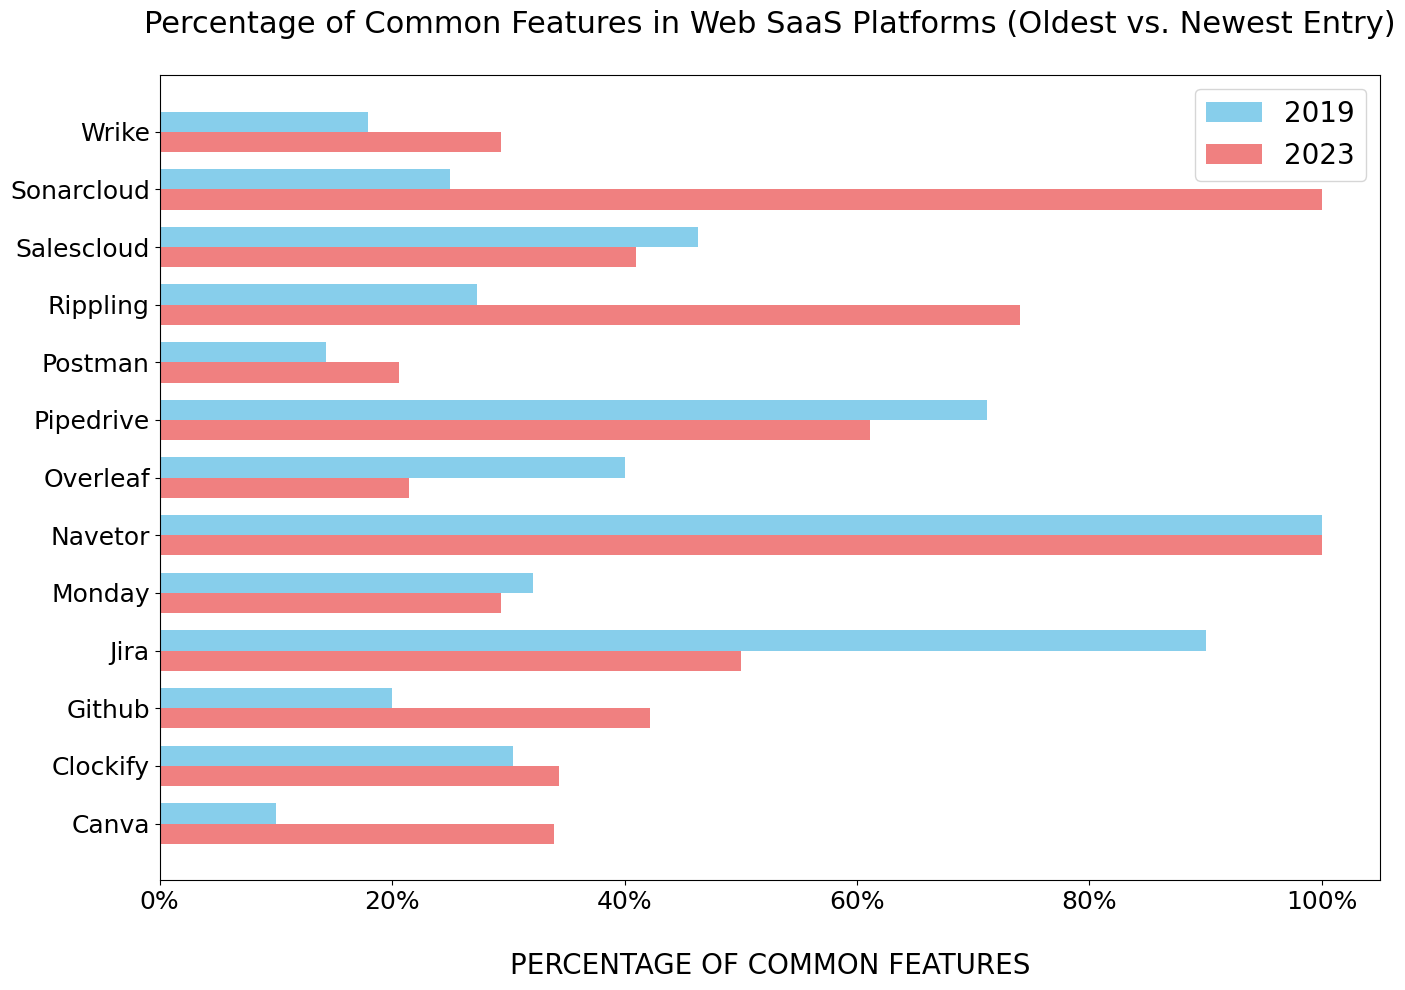

In [48]:
show_evolution_of_common_features_percentage(18)